<center><h1>Bank Churn Prediction</h1></center>

## Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

## Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

## Data Discription

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

## Data Dictionary 

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer 
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary 
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
* Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
    * 0=No ( Customer did not leave the bank )
    * 1=Yes ( Customer left the bank )

## Let's start coding!

### Loading necessary libraries

In [1]:
#importing tensorflow
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


import warnings
warnings.filterwarnings("ignore")

## ML libraries
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
tf.random.set_seed(2)

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score, 
    recall_score, 
    f1_score, 
    precision_recall_curve, 
    auc,
    make_scorer,
    plot_confusion_matrix,
    roc_curve,
    roc_auc_score
)
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA

### Load the data for analysis

In [3]:
data=pd.read_csv('bank.csv')
df = data.copy()

### Shape of the data

In [4]:
print("There are "+ str(df.shape[0]) +" rows and "+ str(df.shape[1])+" columns") 

There are 10000 rows and 14 columns


### Let's view a sample of the dataset.

In [5]:
np.random.seed(2)  # To get the same random results every time
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7878,7879,15760456,Eberechukwu,731,France,Female,38,10,123711.73,2,1,0,171340.68,1
3224,3225,15713463,Tate,645,Germany,Female,41,2,138881.04,1,1,0,129936.53,1
1919,1920,15739858,Otitodilichukwu,618,France,Male,56,7,0.00,1,1,1,142400.27,1
4432,4433,15751193,Nnaemeka,621,Spain,Male,33,4,0.00,2,1,1,40299.23,0
4835,4836,15590623,Kovalyov,561,Spain,Male,34,4,85141.79,2,1,1,29217.37,0
4895,4896,15589435,Davide,784,France,Male,31,7,0.00,2,1,1,143204.41,0
7269,7270,15675926,Ardis,655,Germany,Male,34,7,118028.35,1,1,0,51226.32,1
1451,1452,15684198,McDonald,551,France,Female,38,10,0.00,2,1,1,216.27,0
1742,1743,15578603,Alexeieva,584,Germany,Female,54,1,77354.37,1,0,0,138192.98,1
4628,4629,15788151,Moore,650,Spain,Male,32,1,132187.73,2,1,1,178331.36,0


### Duplicate values in the data

In [6]:
df.duplicated().sum()

0

### Missing values (count) in the data.

In [7]:
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Unique values (count) in the data.

In [8]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Data types of the columns in the dataset.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Summary of the dataset

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
CustomerId,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
NumOfProducts,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


### Data balance check

In [11]:
df.groupby('Exited').size()

Exited
0    7963
1    2037
dtype: int64

**Observation**
* No duplicate records present
* No missing value present
* Dataset is not balance with respected to Exited, There are 7963 customers who not exited the bank as compated to exited (2073 customers).
* There are 3 differet customer’s location present in the dataset and France has 5014 customers
* Maximum numbers of customers are Male (5457 customers)
* Smith is the most common surname, there are 2932 unique surname prsent in the dataset
* Average credit score of customers are 650.5288
* Youngest customer age is 18 and the oldest customer age is 92. Average age of the customers are ~38 yrs
* Average Tenure of customers are 5 and the longest tenure is 10 yrs.
* Maximum number of products that customer has is 4.
* Average balance in customer accound is 76485, with minimum being 0 and maximum being 250898, median being 97198.54
* Average EstimatedSalary is 100090 with minimum being 11.58 and maximum 199992.48 and median being 100193.915
* Balance and EstimatedSalary seems to have right skewed data

### Dropping of `RowNumber`, `CustomerId` and `Surname` column
These columns represents serial number or title of customer, which doesn't add any value for identifying which customers will churn. Hence dropping of the these columns

In [12]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.drop(['CustomerId'],axis=1,inplace=True)
df.drop(['Surname'],axis=1,inplace=True)

## EDA & Data Visualization

In [13]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(30, 20), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## Univariate Analysis

### Numerical Variables

#### CreditScore

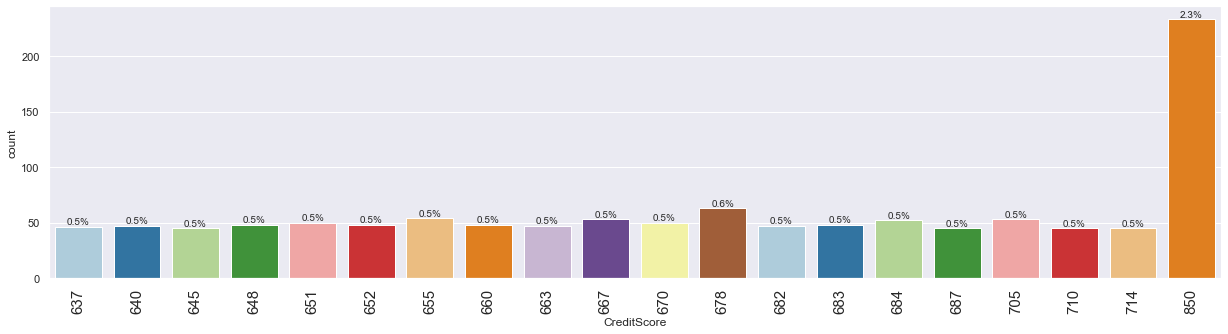

In [14]:
# Top 20 cusotmers CreditScore
labeled_barplot(df, "CreditScore", perc=True,n=20)

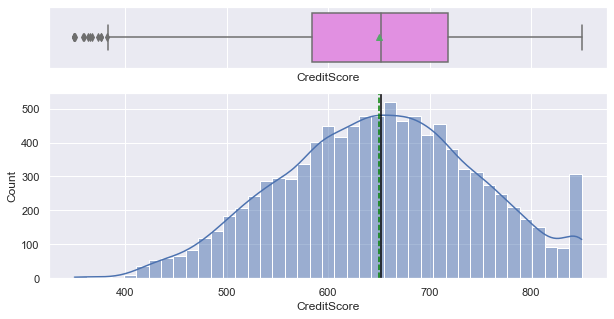

In [15]:
histogram_boxplot(df, 'CreditScore', kde=True, figsize=(10, 5))

**Observation**
* 2.3% customers has 850 credit score
* Data is slightly skewed and it has some outliers on the left

#### Age

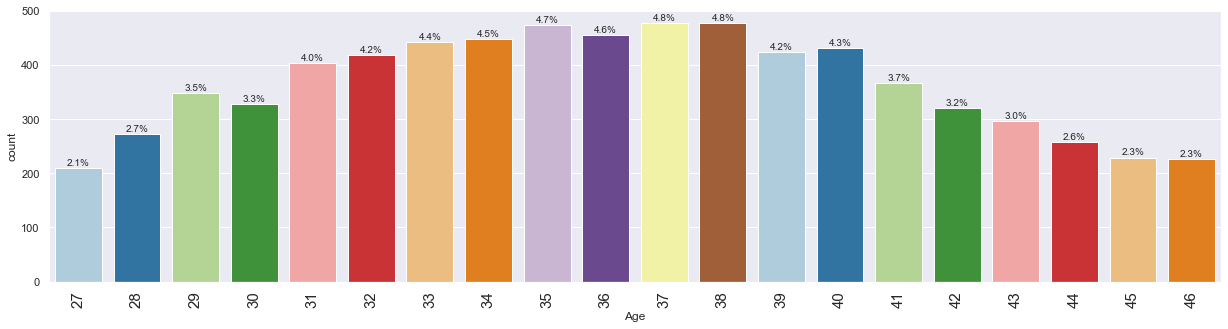

In [16]:
# Top 20 cusotmers Age
labeled_barplot(df, "Age", perc=True,n=20)

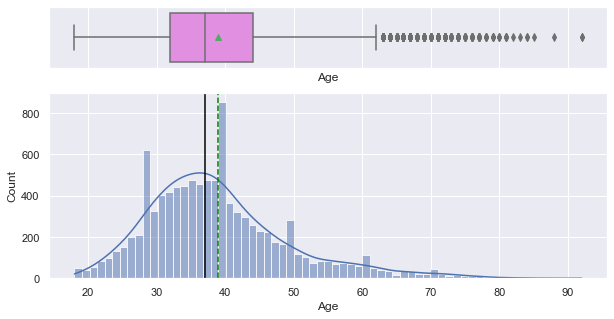

In [17]:
histogram_boxplot(df, 'Age', kde=True, figsize=(10, 5))

**Observation**
* 2.3% of customers has age of 40 yrs
* Most custmers are in te age group of 30-40 yrs
* There are outliers prest above the age of 60 yrs. 
* Dataset is right skewed

#### Tenure

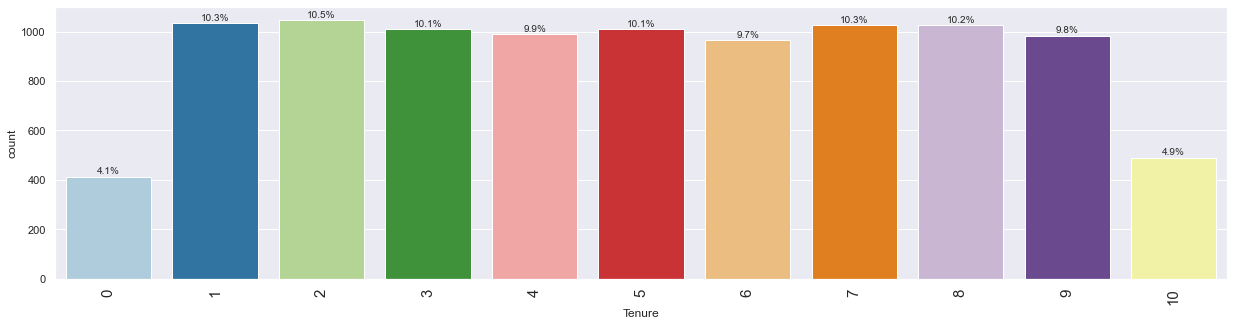

In [18]:
# Top 20 cusotmers Tenure
labeled_barplot(df, "Tenure", perc=True,n=20)

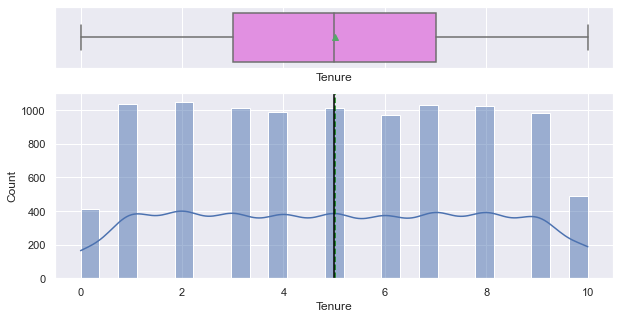

In [19]:
histogram_boxplot(df, 'Tenure', kde=True, figsize=(10, 5))

**Observation** 
* Data has no outlier and its has no skewness

#### Balance

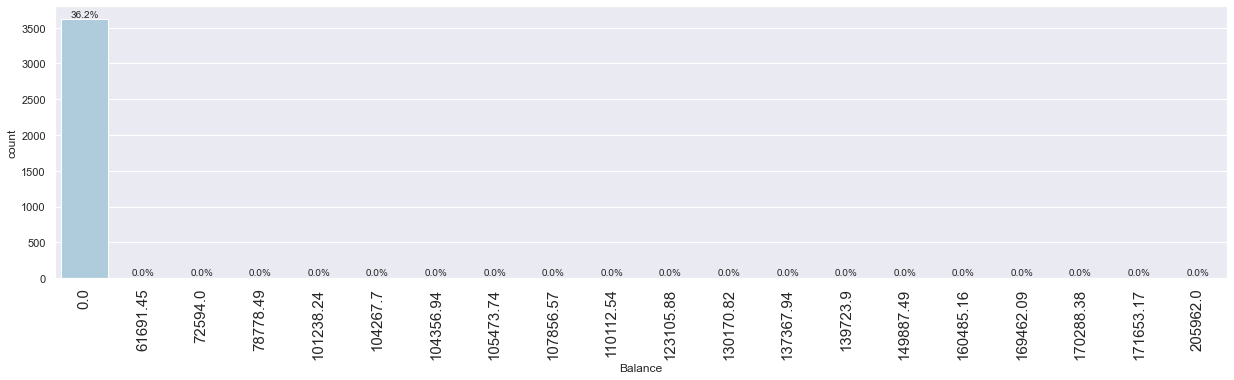

In [20]:
# Top 20 cusotmers Balance
labeled_barplot(df, "Balance", perc=True,n=20)

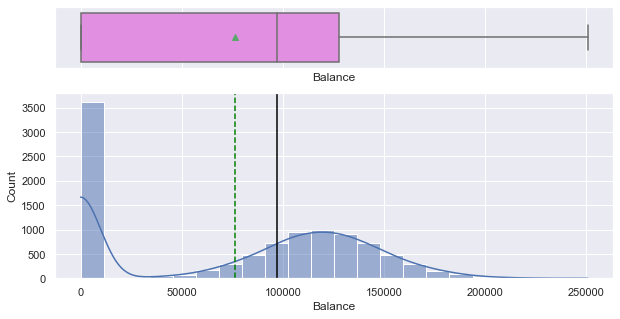

In [21]:
histogram_boxplot(df, 'Balance', kde=True, figsize=(10, 5))

**Observation**
* Around 36.2% customers has 0 balance

#### NumOfProducts

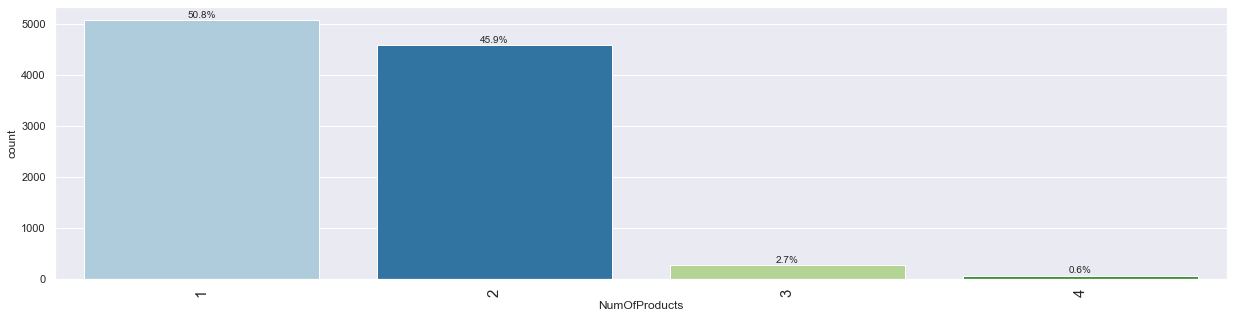

In [22]:
# Top 20 cusotmers NumOfProducts
labeled_barplot(df, "NumOfProducts", perc=True,n=20)

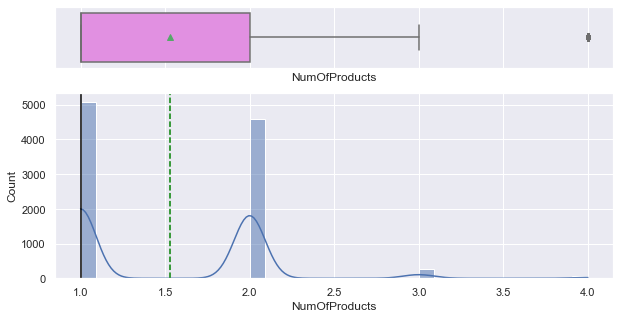

In [23]:
histogram_boxplot(df, 'NumOfProducts', kde=True, figsize=(10, 5))

**Observation**
* 50.8% of customers has 1 product
* 45.9% of customers has 2 product
* 0.6% customers has 4 product
* There are some outliers on the right end

#### EstimatedSalary

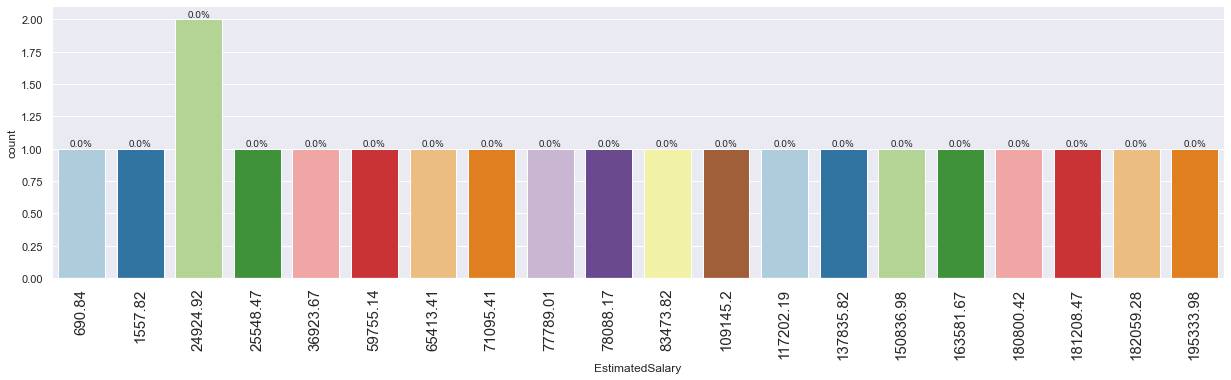

In [24]:
# Top 20 customer's EstimatedSalary
labeled_barplot(df, "EstimatedSalary", perc=True,n=20)

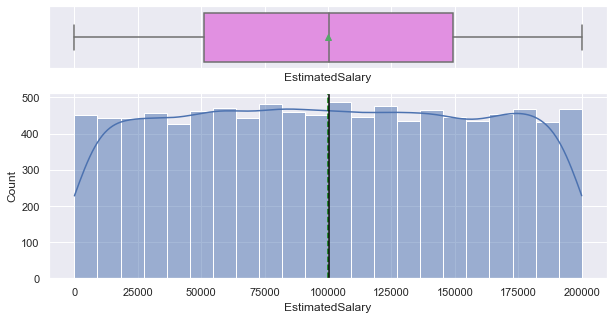

In [25]:
histogram_boxplot(df, 'EstimatedSalary', kde=True, figsize=(10, 5))

**Observation**
* There is no outliers and data is normal distribution

### Categorical Variables


#### HasCrCard

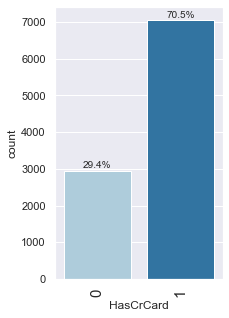

In [26]:
# HasCrCard
labeled_barplot(df, "HasCrCard", perc=True)

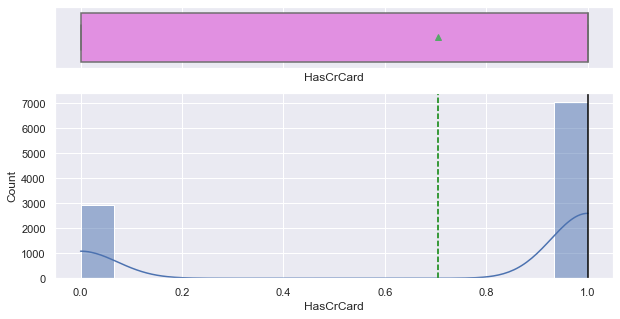

In [27]:
histogram_boxplot(df, 'HasCrCard', kde=True, figsize=(10, 5))

**Observation**
* 29.4% customer has no Credit card
* 70.5% customers has  Credit cards

#### IsActiveMember

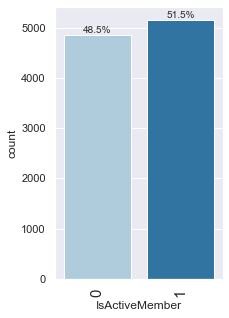

In [28]:
# IsActiveMember
labeled_barplot(df, "IsActiveMember", perc=True)

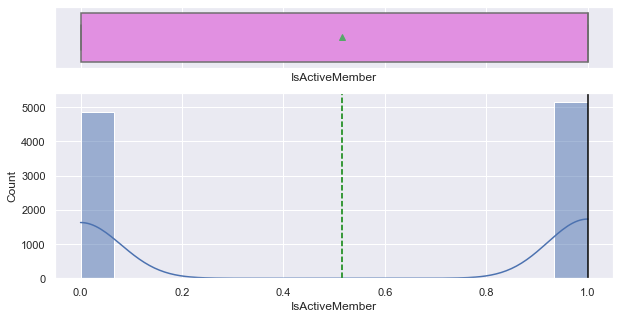

In [29]:
histogram_boxplot(df, 'IsActiveMember', kde=True, figsize=(10, 5))

##### **Observation**
* 48.5% of customers is not active customers
* 50.5% customers is active customers

#### Geography

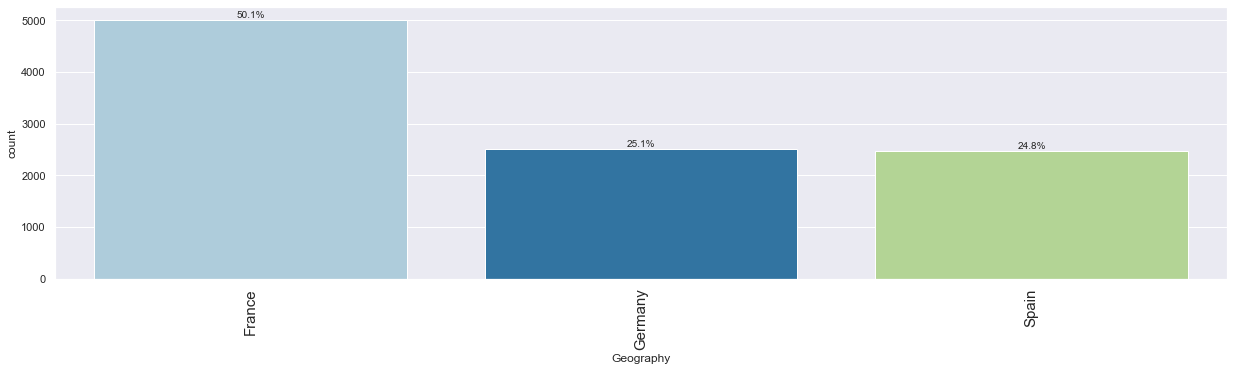

In [30]:
# customer's Geography
labeled_barplot(df, "Geography", perc=True,n=20)

**Observation**
* There are 3 counteries in the dataset
* Maximun number of customers is from France (50.1), followed by Germany (25.1%) and Spain (24.8%) 

#### Gender

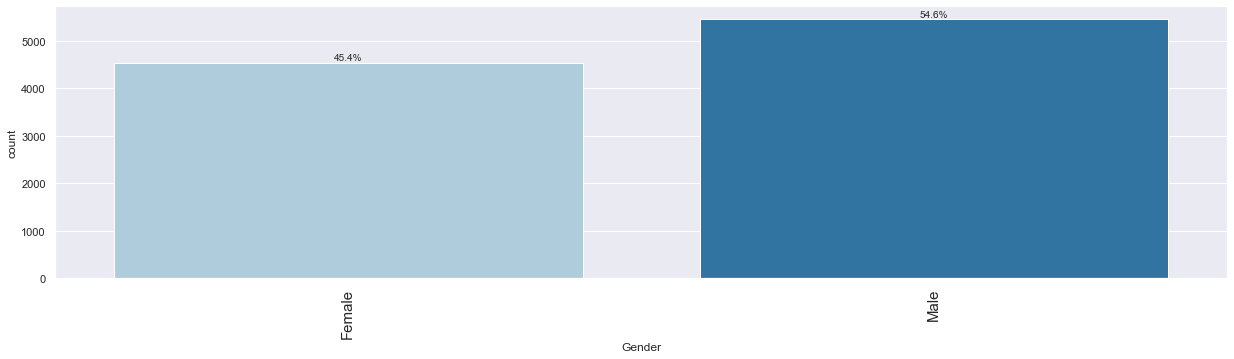

In [31]:
# Gender
labeled_barplot(df, "Gender", perc=True,n=20)

**Observation**
* 54.6% of customers are Male and 45.4% customers are Female

#### Exited

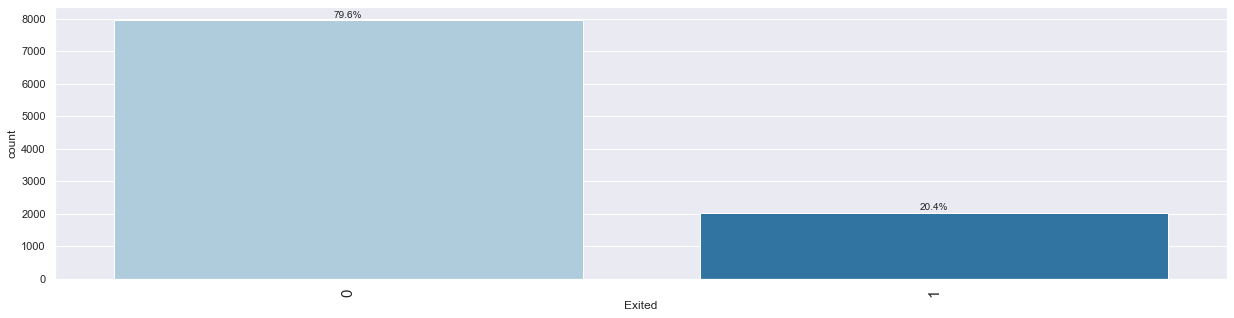

In [32]:
# Gender
labeled_barplot(df, "Exited", perc=True,n=20)

**Observation**
* 20.4% of customers has exited from the bank.

### Bivariate Analysis

In [33]:
# Adds mean, median and mode line to the graph
def addGrapVLines(df, columnName,plot, title):
    plot.axvline(df[columnName].mean(), color='lightgreen', linestyle='-',linewidth=1)
    plot.axvline(df[columnName].median(), color='red', linestyle='--',linewidth=2)
    plot.axvline(df[columnName].mode()[0], color='orange', linestyle='-',linewidth=1)
    plot.legend({'Mean':df.mean(),'Median':df.median(),'Mode':df.mode()})
    plot.set(title=title)
    
# Draws two different types of graph (boxplot,distplot) with hue columntogather
def drawBiVariantGraph(df,columnName,hueColumn):
    fig, axes = plt.subplots(ncols=3,figsize=(15, 5))

    plot=sns.distplot(x=df[df[hueColumn]==0][columnName],ax=axes[0],hist=True,kde=True)
    addGrapVLines(df,columnName,plot,"Variation in the data distribution\n for '"+columnName+"', where "+hueColumn+"=0")

    plot=sns.distplot(x=df[df[hueColumn]==1][columnName],ax=axes[1],hist=True,kde=True)
    addGrapVLines(df,columnName,plot,"Variation in the data distribution\n for '"+columnName+"', where "+hueColumn+"=1")
    
    plot=sns.boxplot(data=df,y=columnName,x=hueColumn,hue=hueColumn, showmeans=True, ax=axes[2])
    plot.set(title="Data distribution and skewness\n for '"+columnName+"'")
    
# Draws Count plot for a particular column    
def drawCountPlot(df,columnName,axes):
    dfPoints=df[columnName]
    indexCount = dfPoints.value_counts().index
    ax = sns.countplot(dfPoints, order=indexCount ,ax=axes)
    for patch in ax.patches:
        percentage = 100 * (patch.get_height()*1.0)/dfPoints.count()
        x = patch.get_x() + patch.get_width() / 2 - 0.05 
        y = patch.get_y() + patch.get_height()
        ax.annotate("{percent:.2f}".format(percent=percentage)+"%", (x, y)) 

### Numerical Variables

####  CreditScore vs Exited

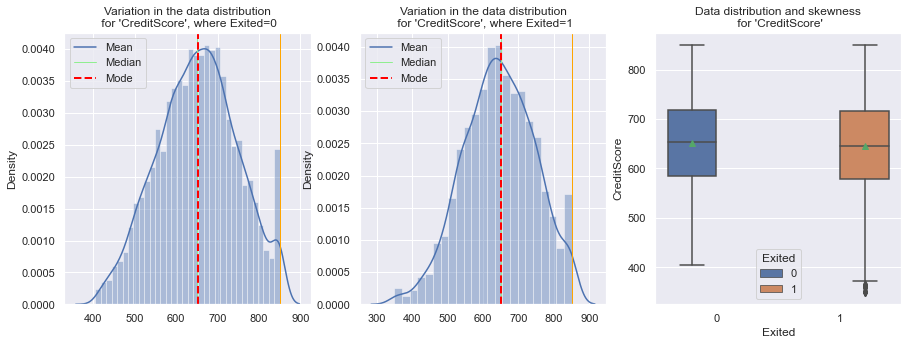

In [34]:
drawBiVariantGraph(df,'CreditScore','Exited')

####  Age vs Exited

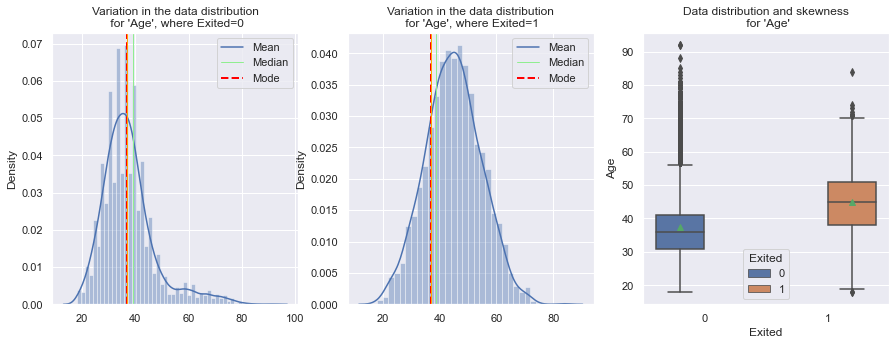

In [35]:
drawBiVariantGraph(df,'Age','Exited')

####  Tenure vs Exited

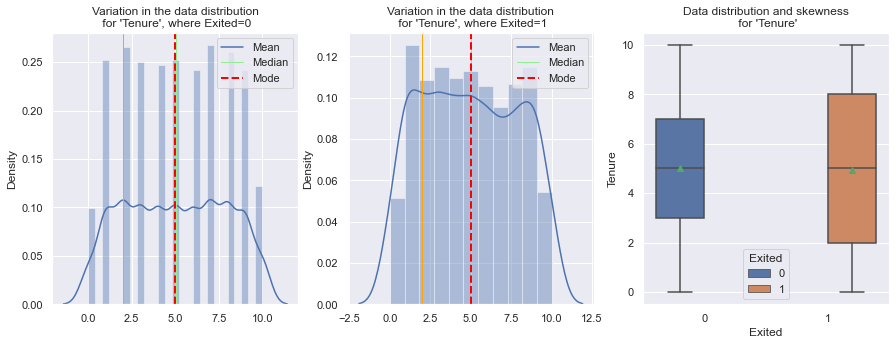

In [36]:
drawBiVariantGraph(df,'Tenure','Exited')

####  Balance vs Exited

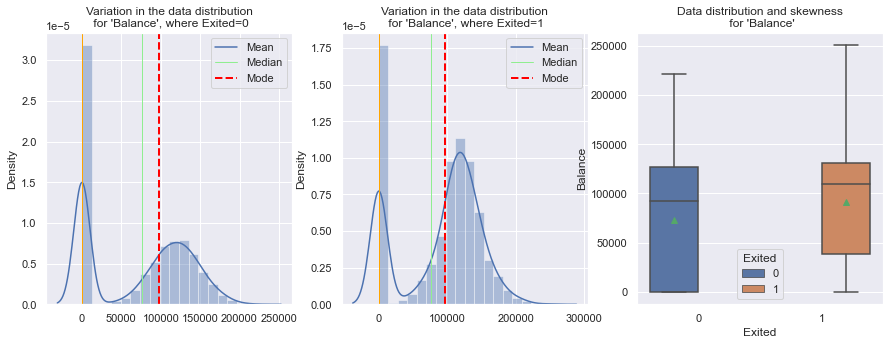

In [37]:
drawBiVariantGraph(df,'Balance','Exited')

####  NumOfProducts vs Exited

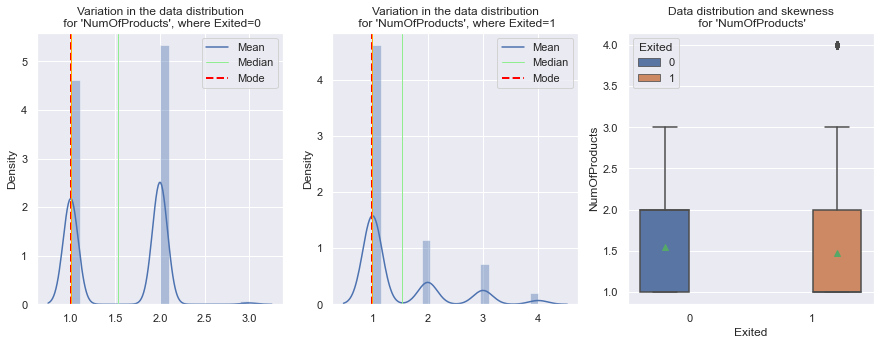

In [38]:
drawBiVariantGraph(df,'NumOfProducts','Exited')

####  EstimatedSalary vs Exited

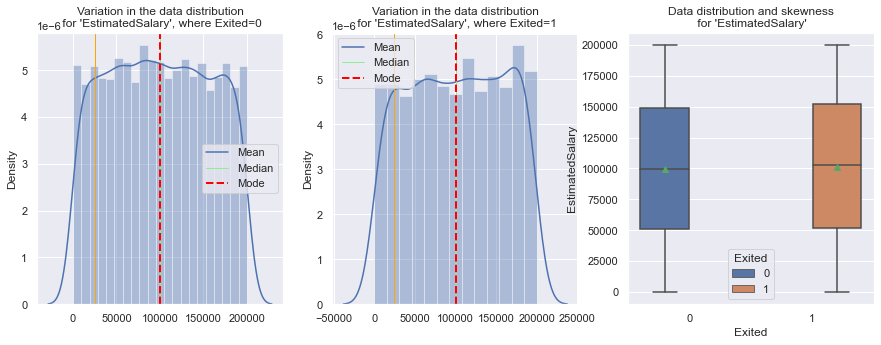

In [39]:
drawBiVariantGraph(df,'EstimatedSalary','Exited')

**Observation**
* Data distribution is more or less same for CreditScore, EstimatedSalary with resptect to Exited.
* It seems like Customers who exited the bank has more age as compared to who remain with the bank.
* Customers with 2+ products is more likly to left the bank
* Customers with Higher balance is more likly to left bank.

### Categorical Variables 

####  HasCrCard vs Exited

Text(0.5, 1.0, 'HasCrCard  vs Exited')

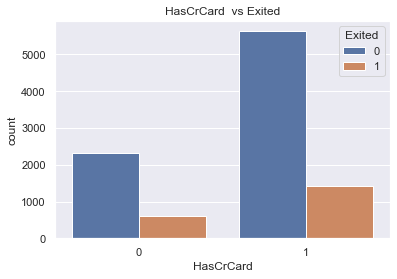

In [40]:
sns.countplot(x='HasCrCard',hue='Exited',data=df).set_title('HasCrCard  vs Exited')

####  IsActiveMember vs Exited

Text(0.5, 1.0, 'IsActiveMember  vs Exited')

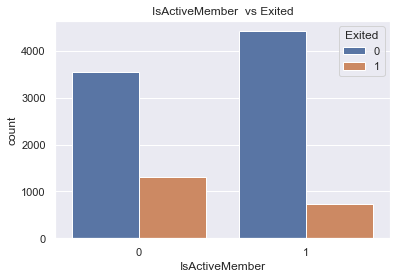

In [41]:
sns.countplot(x='IsActiveMember',hue='Exited',data=df).set_title('IsActiveMember  vs Exited')

#### Geography vs Exited 

Text(0.5, 1.0, 'Geography  vs Exited')

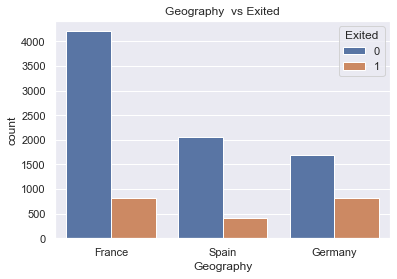

In [42]:
sns.countplot(x='Geography',hue='Exited',data=df).set_title('Geography  vs Exited')

#### Gender vs Exited 

Text(0.5, 1.0, 'Gender  vs Exited')

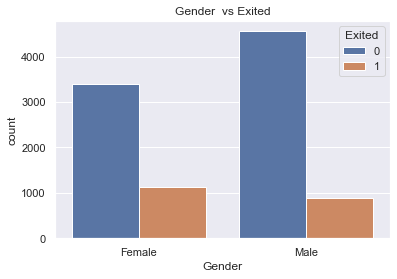

In [43]:
sns.countplot(x='Gender',hue='Exited',data=df).set_title('Gender  vs Exited')

**Observation**
* Customers who have CreditCard left the bank as compared to who don't have
* Customers who are not active is more likly to leave the bank
* Germany and France Customers is more likly to leave as compared to Spain
* More Female customers left the bank as compared to Male customers

### EDA - When customer has left the bank

In [44]:
# Extract records where Exited==1
customerLeftDf=df[df['Exited']==1]
customerLeftDf.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7084,805,Germany,Male,56,6,151802.29,1,1,0,46791.09,1
9572,644,Spain,Male,18,7,0.00,1,0,1,59645.24,1
6724,752,France,Female,41,8,0.00,2,1,0,139844.04,1
6766,638,Germany,Female,33,5,129335.65,1,1,1,56585.20,1
4342,554,Spain,Male,30,6,135370.12,1,1,1,179689.05,1


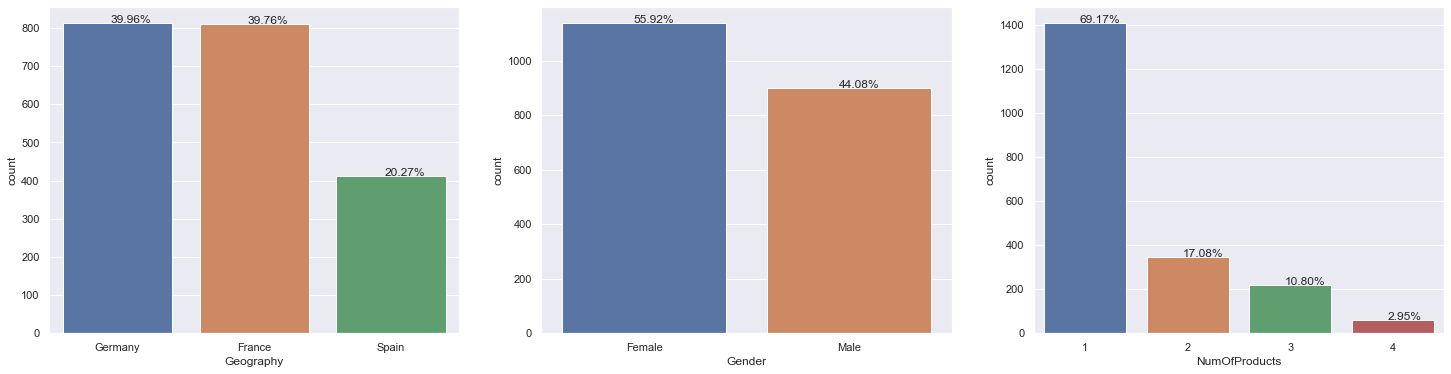

In [45]:
fig, axes = plt.subplots(ncols=3,figsize=(25,6))
drawCountPlot(customerLeftDf,'Geography',axes[0])
drawCountPlot(customerLeftDf,'Gender',axes[1])
drawCountPlot(customerLeftDf,'NumOfProducts',axes[2])

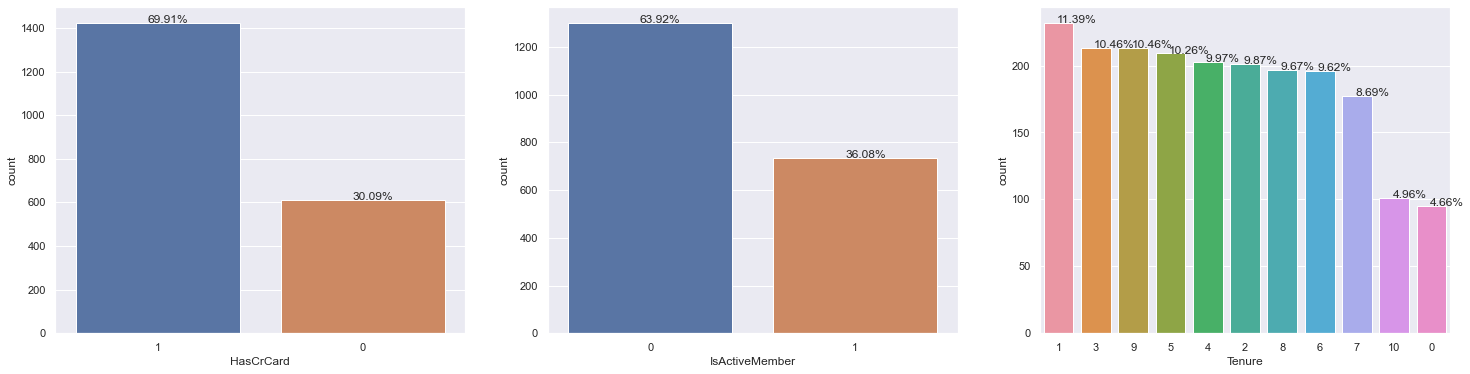

In [46]:
fig, axes = plt.subplots(ncols=3,figsize=(25,6))
drawCountPlot(customerLeftDf,'HasCrCard',axes[0])
drawCountPlot(customerLeftDf,'IsActiveMember',axes[1])
drawCountPlot(customerLeftDf,'Tenure',axes[2])

**Observation**
* Germany(39.96%), France(39.76%) and Spain(20.27%) customers left the bank.
* More Female customers left the bank as compared to Male customers. ie. Female (55.92%) and Male (44.06%) customers left the bank
* Customers with one product (69.17%), two product (17.08%), three product (10.80%) and four product (2.95%) customers left the bank
* Customers with cards left more than who had no card. ie. Customers with card (69.91%) and with no card (30.09%) left the bank
* More inactive customers left the bank as compared to active customers. ie.Customers who are not active (63.92%) and active (36.08%) left the bank


<Figure size 720x504 with 0 Axes>

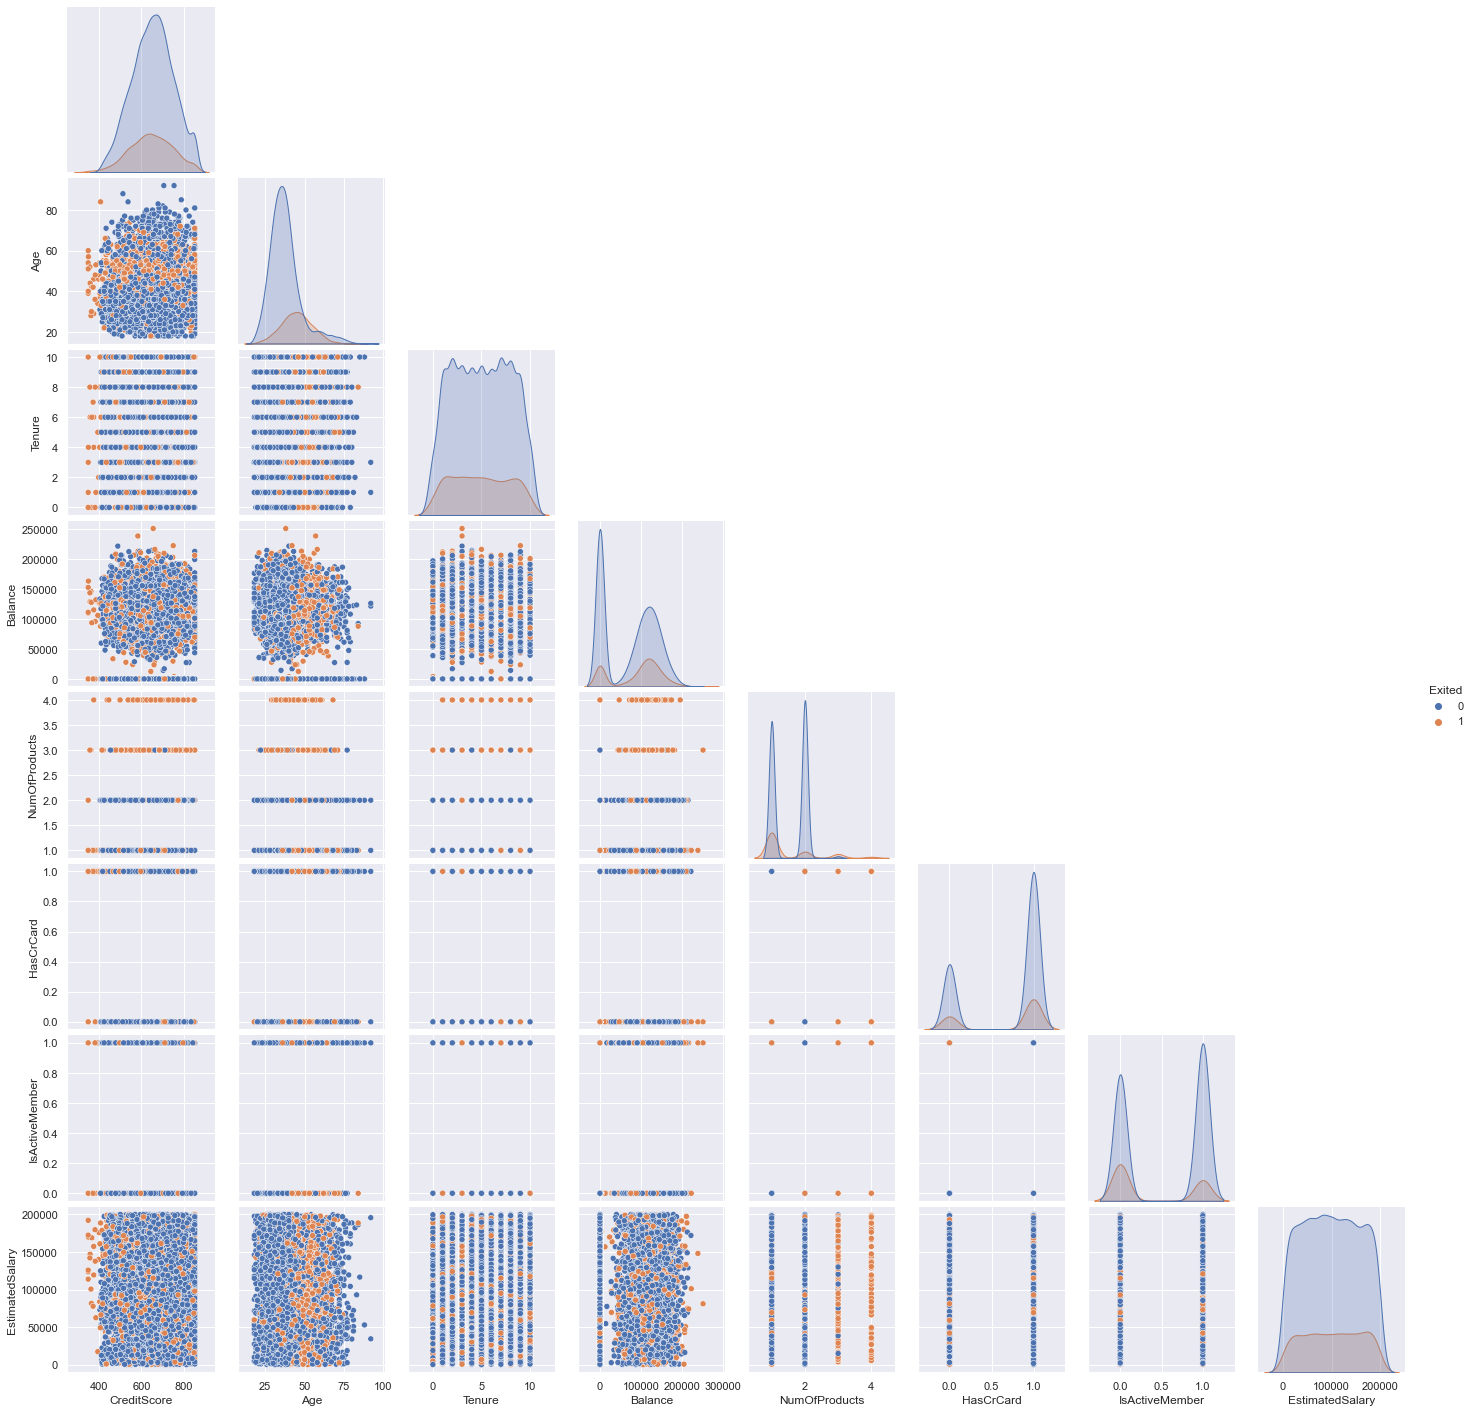

In [47]:
plt.figure(figsize=(10, 7))
sns.pairplot(df,corner=True,hue='Exited',diag_kind='kde')

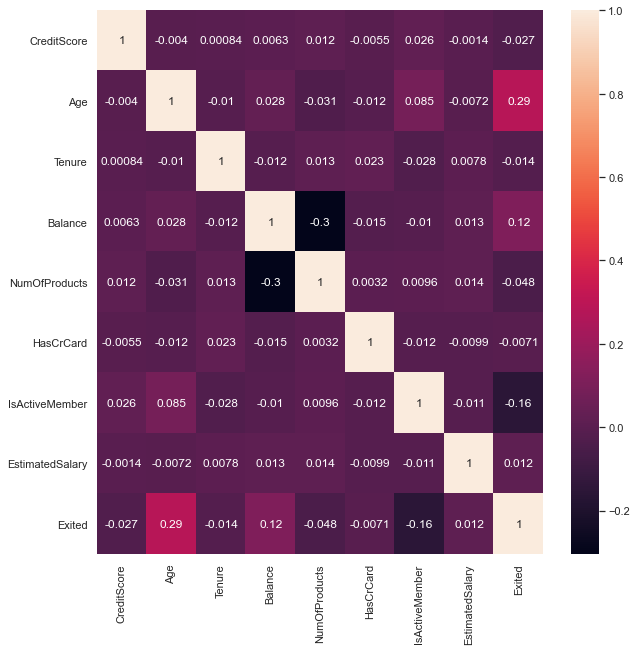

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Observation**
* Age has a positive correlation of 0.29 with Exited
* Balance has a positive correlation of 0.12 with Exited
* Balance has a negative correlation 0f -0.3 with  NumberOfProducts
* IsActiveMemeber has negative correlation of -0.16 with Exited.

## Insights based on EDA

* No duplicate records present
* No missing value present
* Dataset is not balance with respected to Exited, There are 7963 customers who not exited the bank as compated to exited (2073 customers).
* More Female customers left the bank as compared to Male customers. ie. Female (55.92%) and Male (44.06%) customers left the bank
* Youngest customer age is 18 and the oldest customer age is 92. Average age of the customers are ~38 yrs. Older customer is more likly to leave the bank
* Average Tenure of customers are 5 and the longest tenure is 10 yrs.
* Maximun number of customers is from France (50.1), followed by Germany (25.1%) and Spain (24.8%) but maximum number of customer left from Germany(39.96%) followed by France(39.76%) and then Spain(20.27%).
* Customers with 3 or 4 products is more likly to leave the bank.
* Customers having card is more likly to leave then customers with no cards.
* Customers who are not active is more likly to leave the bank as compared to active customers
* Age has a positive correlation of 0.29 with Exited, ie., As the age of the customers increases customer is more likly to leave the bank.
* Balance has a positive correlation of 0.12 with Exited, ie., as the Balance increase customer is likly to leave the bank.
* IsActiveMemeber has negative correlation of -0.16 with Exited. If the customer is active its less likly to leave the bank.

## Data Pre-Processing

#### Changing the datatype of category column to Categroy

In [49]:
df['Geography'] = df['Geography'].astype('category')
df['Gender'] = df['Gender'].astype('category')

#### Creating dummy variables for the categorical features

In [50]:
df = pd.get_dummies(df,drop_first=True)
#df = df.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.

### Data Preparation

#### Separating target column

In [51]:
X = df.drop(['Exited'],axis=1)
y = df['Exited']

#### Spliting data into training, test and validation set

In [52]:
#Splitting the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 8000
Number of rows in test data = 2000


## Building the model

### Model can make wrong predictions as:
* Predicting a customer will leave the bank and the customer doesn't
* Predicting a customer will not leave the bank but the customer does

### Which case is more important?
* A loss of opportunity (ie. second case) - bank failed to make attempt to make the customer stay due to wrong prediction. The whole purpose of this investigatation is to make sure we increase churn of customers from the bank.

### How to reduce this loss i.e need to reduce False Negatives?
* recall should be maximized, the greater the recall lesser the chances of false negatives

### Performance metric variables

In [54]:
test_accuracy = []
test_recall = []
test_precision = []
test_f1_score=[]

### Utility methods

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""
        
        
    test_accuracy.append(accuracy)
    test_recall.append(recall)
    test_precision.append(precision)
    test_f1_score.append(f1_score) 
    
    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title) 
        
        

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']



def draw_roc_curve_keras(modelName,y_test,y_pred):
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
    auc_keras = auc(fpr_keras, tpr_keras)
    opt_index = np.argmax(np.abs(tpr_keras-fpr_keras))  # Optimal threshold: point where tpr is high and fpr is low
    opt_threshold = thresholds[opt_index]

    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')

    plt.plot(fpr, tpr, label="{:s} (area = {:0.2f}, Optimal Threshold={:0.2f}".format(modelName,auc_keras, opt_threshold))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [56]:
## variables to store different models
models = []

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,random_state=1)
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest_model=random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array
y_pred = random_forest_model.predict(X_test)
random_forest_model.score(X_test,y_test)

models.append(random_forest_model)

In [58]:
# Calculating different metrics on train set
random_forest_train = model_performance_classification_sklearn(
    random_forest, X_train, y_train
)
print("Train performance:")
random_forest_train

Train performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [59]:
# Calculating different metrics on test set
random_forest_test = model_performance_classification_sklearn(
    random_forest, X_test, y_test
)
print("Test performance:")
random_forest_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.8605,0.450602,0.785714,0.572741


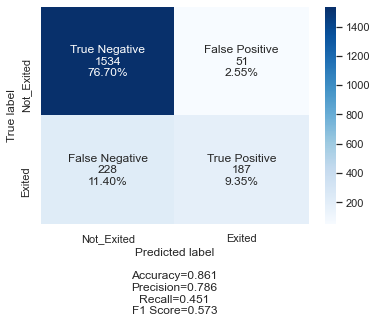

In [60]:
# creating confusion matrix
cm_random_forest=confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm_random_forest, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### ROC Curve

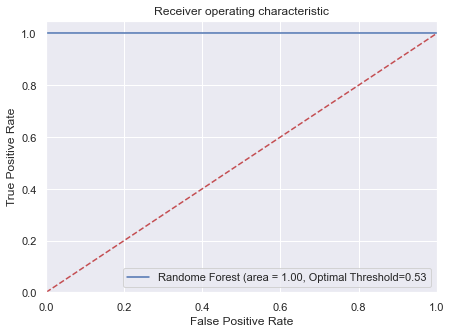

In [61]:
rf_roc_auc_train = roc_auc_score(y_train, random_forest.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, random_forest.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))

opt_index = np.argmax(np.abs(tpr-fpr))  # Optimal threshold: point where tpr is high and fpr is low
opt_threshold = thresholds[opt_index]
plt.plot(fpr, tpr, label="Randome Forest (area = {:0.2f}, Optimal Threshold={:0.2f}".format(rf_roc_auc_train, opt_threshold))
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Linear Regression

In [62]:
from sklearn.linear_model import LogisticRegression

linearReg = LogisticRegression(solver='newton-cg',random_state=1)
linearReg_model  = linearReg.fit(X_train,y_train.values.ravel())
y_pred = linearReg_model.predict(X_test)
linearReg_model.score(X_test,y_test)


models.append(linearReg_model)

In [63]:
# Calculating different metrics on train set
linearReg_train = model_performance_classification_sklearn(
    linearReg, X_train, y_train
)
print("Train performance:")
linearReg_train

Train performance:


,Accuracy,Recall,Precision,F1
0,0.813,0.188656,0.62963,0.290323


In [64]:
# Calculating different metrics on test set
linearReg_test = model_performance_classification_sklearn(
    linearReg, X_test, y_test
)
print("Test performance:")
linearReg_test

Test performance:


,Accuracy,Recall,Precision,F1
0,0.813,0.192771,0.672269,0.299625


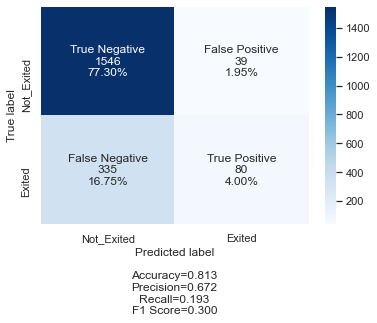

In [65]:
# creating confusion matrix
cm_linearReg=confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm_linearReg, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### ROC Curve

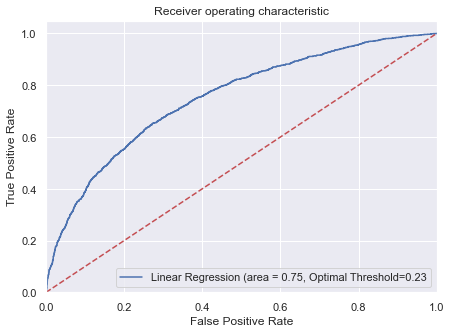

In [66]:
lg_roc_auc_train = roc_auc_score(y_train, linearReg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, linearReg.predict_proba(X_train)[:, 1])

opt_index = np.argmax(np.abs(tpr-fpr))  # Optimal threshold: point where tpr is high and fpr is low
opt_threshold = thresholds[opt_index]

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Linear Regression (area = {:0.2f}, Optimal Threshold={:0.2f}".format(lg_roc_auc_train, opt_threshold))
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

## Let's now explore Neural Network models

### Artificial Deep Neural Network

#### Model-1

We will use a simple NN made of 5 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either as not exited (0) or exited (1).

A dropout step is included to prevent overfitting.

#### Dropout

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly.

### Creating a model
Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

In [67]:
#initialize the model
model = tf.keras.Sequential()

### Adding layers [layers and activations]
Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

In [68]:
model.add(Dense(units=11, input_dim =11 ,activation='relu'))   # input of 11 columns as shown above
# hidden layer

model.add(Dense(24,activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(24,activation='relu'))
model.add(Dense(24,activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1,activation='sigmoid'))  

### Model compile [optimizers and loss functions]
Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

In [69]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
models.append(model)

### Let's print the summary of the model

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                288       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,645
Trainable params: 1,645
Non-trainable params: 0
______________________________________________________

### Training [Forward pass and Backpropagation]

#### Training the model

In [71]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=32,epochs=150,validation_split=0.2,verbose=0)
score = model.evaluate(X_test, y_test, verbose=0)  # tensorflow default threshold = 0.5
print("Accuracy training with imbalanced data (default threshold=0.5): {:-5f} %".format(score[1] * 100))

y_pred = model.predict(X_test) > 0.5  # manual threshold
valsize = y_test.shape[0]

Accuracy training with imbalanced data (default threshold=0.5): 79.250002 %


#### Plotting the train and test loss

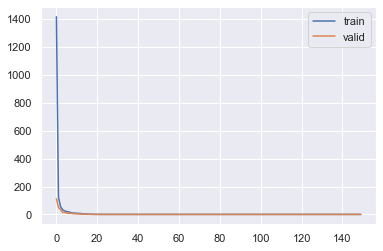

In [72]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

In [73]:
print(score)

[0.5104354619979858, 0.7925000190734863]


In [74]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7925


#### Let's Print confusion matrix

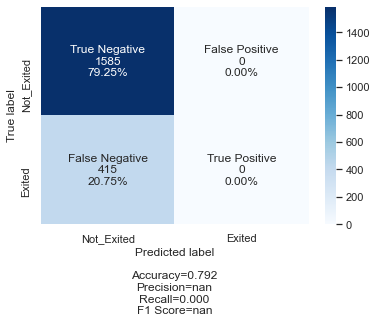

In [75]:
## Confusion Matrix on unsee test set
ann_cm=confusion_matrix(y_test, y_pred)
make_confusion_matrix(ann_cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

Churn of Customers detection is not improved as compared to earlier (RandomForest, Linear Regression) models 

Model predicted that 415 customers will not leave the bank but they left the bank. Our main goal is to reduce the False Negative by increasing recall value. Recall value (0.0) for this model is also very less. 

### ROC Curve

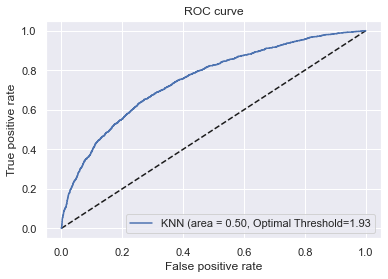

In [76]:
draw_roc_curve_keras('KNN',y_test, y_pred)

### Let's try another architecture to get the better Recall

There are some basic Hyperparameters which can help to get the better model performance.

#### Early stopping

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after the certian interations.The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

#### Weight Initialization

Weight initialization is an important consideration in the design of a neural network model.

The nodes in neural networks are composed of parameters referred to as weights used to calculate a weighted sum of the inputs.

Neural network models are fit using an optimization algorithm called stochastic gradient descent that incrementally changes the network weights to minimize a loss function, hopefully resulting in a set of weights for the mode that is capable of making useful predictions.

This optimization algorithm requires a starting point in the space of possible weight values from which to begin the optimization process. Weight initialization is a procedure to set the weights of a neural network to small random values that define the starting point for the optimization (learning or training) of the neural network model.

There are many WI techniques as follows:

* Random normal initialization
* Random Uniform initialization
* Xaviour Initialization
* He Initialization

In [77]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,patience=15, verbose=0, mode='min', restore_best_weights= True)
model2 = Sequential()
##input layer
model2.add(Dense(units=11, input_dim =11 ,activation='relu'))

##hidden layer
model2.add(Dense(units=32,activation='relu'))
model2.add(BatchNormalization()) 
model2.add(Dropout(0.3))

model2.add(Dense(24,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(16,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))


model2.add(Dense(8,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

##output layer
model2.add(Dense(1, activation='sigmoid'))

model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
models.append(model2)
his_mod2= model2.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[es], shuffle=True, verbose=1)





Epoch 1/100
200/200 [==============================] - 2s 3ms/step - loss: 0.7444 - accuracy: 0.6022 - val_loss: 0.5377 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5854 - accuracy: 0.7325 - val_loss: 0.5098 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.7695 - val_loss: 0.4996 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5295 - accuracy: 0.7831 - val_loss: 0.4987 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5221 - accuracy: 0.7917 - val_loss: 0.4971 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.5169 - accuracy: 0.7923 - val_loss: 0.4975 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 1s 5ms/step - loss: 0.5177 - accuracy: 0.7928 - val_loss: 0.4973 - val_accuracy: 0.7975

#### Plotting the train and validation loss

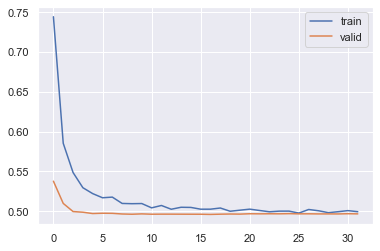

In [78]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

#### Plotting confusion matrix

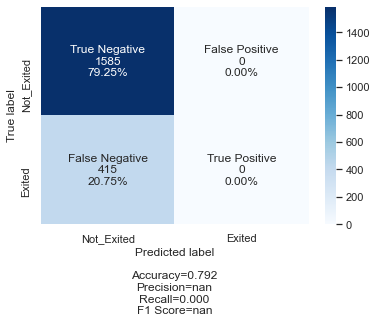

In [79]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred1 = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0



cm2=confusion_matrix(y_test, y_pred1)
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### ROC Curve

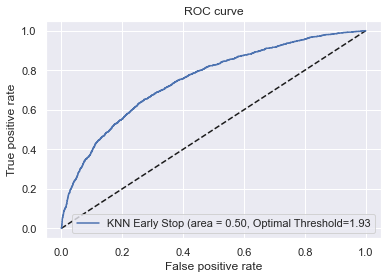

In [80]:
draw_roc_curve_keras('KNN Early Stop',y_test, y_pred1)

**Conclusion**

As you can see here the Recall of the model is slight improved over the Previous ANN model as well as the RandomForest.

Let's try weighted loss for imbalance dataset

### Weighted loss to account for large class imbalance in train dataset
we will adjust the class imbalance by giving additional weight to the loss associated to errors made on detecting churn of customers.
We will use our first ANN model and apply weighted loss

Let's review the process:

In [81]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6271558482282847, 1: 2.466091245376079}

The class 'Exited' (y=1) is assigned a weight of2.46 vs 0.62 for the class 'not exited' due to the very low prevalence we detected during data exploration. This allows the model to give more importance to the errors made on detecting churn of customers.

#### Training the model

In [82]:
model_class_weight=model.fit(X_train,y_train,batch_size=32,epochs=100, class_weight=class_weights, shuffle=True)
models.append(model_class_weight)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.7441 - accuracy: 0.7969
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.6936 - accuracy: 0.4874
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6931 - accuracy: 0.5814
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6929 - accuracy: 0.5832
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.2586
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5713
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5139
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5031
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5469: 0s - loss: 0.6886 - accura
Epoch 10/100
250/250 [==============================] - 1s 2ms/

In [83]:
score_weighted = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.6951 - accuracy: 0.2075


#### Plotting confusion matrix

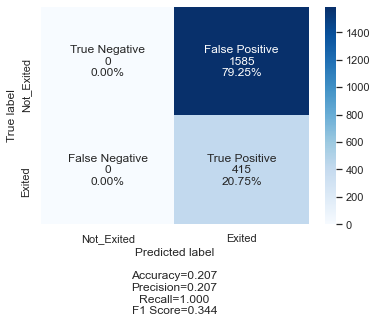

In [84]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm2=confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

#### ROC Curve 

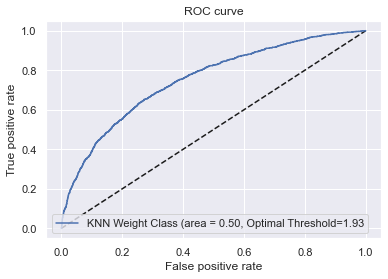

In [85]:
draw_roc_curve_keras('KNN Weight Class',y_test, y_pred)

### Model Performance Improvement - Resampling Technique

### Utility Methods

In [86]:
def create_and_compile_NN_Model(optimizer):
    model = tf.keras.Sequential()
    ##input layer
    model.add(Dense(units=11, input_dim =11 ,activation='relu'))

    ##hidden layer
    model.add(Dense(units=32,activation='relu'))
    model.add(BatchNormalization()) 
    model.add(Dropout(0.3))

    model.add(Dense(24,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(16,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))


    model.add(Dense(8,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    
    # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (fraud or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1,activation='sigmoid'))
    model.compile(Adam(lr=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

def draw_confusion_matrix(Ytest, Ypred,model_history):
    matConf = confusion_matrix(Ytest, Ypred)
    valsize = Ytest.shape[0]
    hist  = pd.DataFrame(model_history.history)
    hist['epoch'] = model_history.epoch
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.legend(("train" , "valid") , loc =0)

    make_confusion_matrix(matConf, 
                          group_names=labels,
                          categories=categories, 
                          cmap='Blues')
    plt.show()
    
def re_sample_data(resamplermethod,X,Y):
    X_resampled, Y_resampled = resamplermethod().fit_resample(X, Y.ravel())
    Y_resampled = Y_resampled[:, np.newaxis]
    data_resampled = np.hstack((X_resampled, Y_resampled))

    print("After {}: \nX.shape: {}, Y.shape: {}".format(resamplermethod,X_resampled.shape, Y_resampled.shape))
    print("{} '0' labels, {} '1' labels".format(sum(Y_resampled==0), sum(Y_resampled==1)))

    data_resampled = np.hstack((X_resampled, Y_resampled))
    np.random.shuffle(data_resampled)
    X_resampled = data_resampled[:,:11]
    Y_resampled = data_resampled[:,11:12]
    return X_resampled,Y_resampled


def train_and_test_nnmodel(X_resampled,Y_resampled):
    X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled.ravel(), test_size=0.2)

    # Neural network model
    modelresampled = create_and_compile_NN_Model(Adam(lr=0.001),)
    model_history = modelresampled.fit(X_train,
                Y_train,
                batch_size=32,
                epochs=100,
                verbose=0,  # silent mode
                validation_data=(X_test, Y_test))
    models.append(modelresampled)
    score = modelresampled.evaluate(X_test, Y_test, verbose=0)  # tensorflow default threshold = 0.5
    print(score)

    Y_pred = modelresampled.predict(X_test) > 0.5

    return modelresampled,Y_test,Y_pred,model_history

### Data Resampling using ClusterCentroids & Model Training and Testing

After <class 'imblearn.under_sampling._prototype_generation._cluster_centroids.ClusterCentroids'>: 
X.shape: (4074, 11), Y.shape: (4074, 1)
[2037] '0' labels, [2037] '1' labels
[0.6528230905532837, 0.6147239208221436]


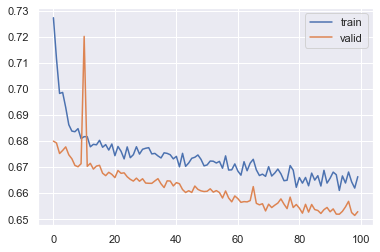

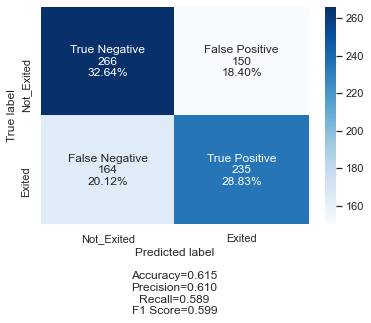

In [87]:
from imblearn.under_sampling import ClusterCentroids
X_resampled, Y_resampled = re_sample_data(ClusterCentroids,X,y)
model, Y_test,Y_pred,model_history = train_and_test_nnmodel(X_resampled, Y_resampled)
draw_confusion_matrix(Y_test, Y_pred,model_history)

#### ROC Curve

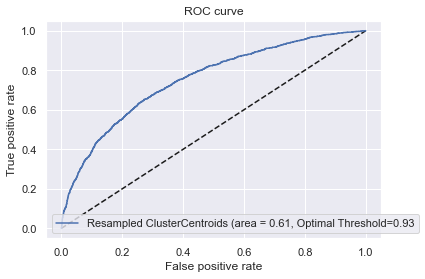

In [88]:
draw_roc_curve_keras('Resampled ClusterCentroids',Y_test, Y_pred)

### Data Resampling using SMOTEENN & Model Training and Testing

After <class 'imblearn.combine._smote_enn.SMOTEENN'>: 
X.shape: (6614, 11), Y.shape: (6614, 1)
[2971] '0' labels, [3643] '1' labels
[0.6347338557243347, 0.6651549339294434]


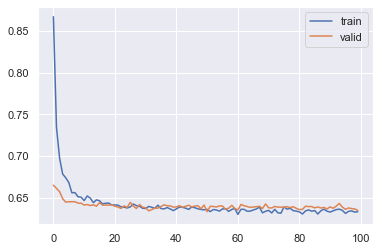

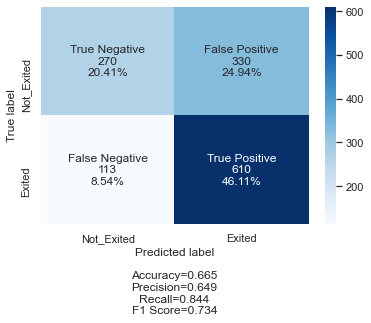

In [89]:
from imblearn.combine import SMOTEENN
X_resampled, Y_resampled = re_sample_data(SMOTEENN,X,y)
model,Y_test,Y_pred,model_history = train_and_test_nnmodel(X_resampled, Y_resampled)
draw_confusion_matrix(Y_test, Y_pred,model_history)

#### ROC Curve

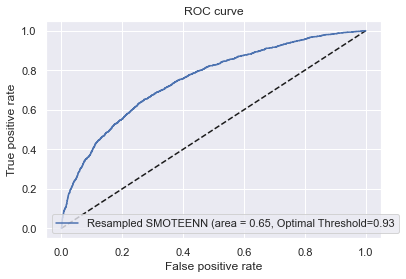

In [90]:
draw_roc_curve_keras('Resampled SMOTEENN',Y_test, Y_pred)

### Data Resampling using ADASYN & Model Training and Testing

After <class 'imblearn.over_sampling._adasyn.ADASYN'>: 
X.shape: (15940, 11), Y.shape: (15940, 1)
[7963] '0' labels, [7977] '1' labels
[0.6854696273803711, 0.5561480522155762]


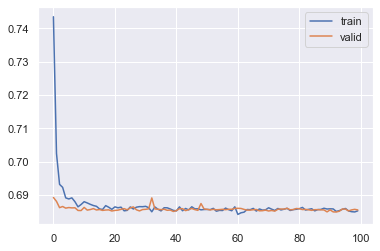

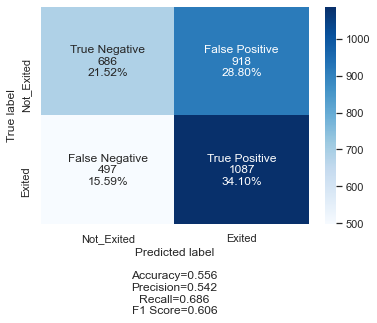

In [91]:
from imblearn.over_sampling import ADASYN
X_resampled, Y_resampled = re_sample_data(ADASYN,X,y)
model,Y_test,Y_pred,model_history = train_and_test_nnmodel(X_resampled, Y_resampled)
draw_confusion_matrix(Y_test, Y_pred,model_history)

#### ROC Curve

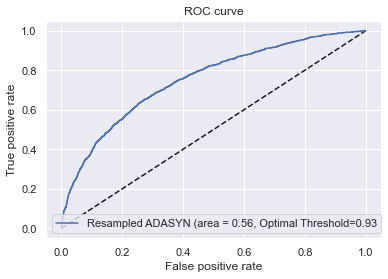

In [92]:
draw_roc_curve_keras('Resampled ADASYN',Y_test, Y_pred)

### Model Comparision

In [93]:
model_comp_df = pd.DataFrame({'Model':['Random Forrest','Logistic Regression','ANN', 'ANN-Early Stopping',
                                          'ANN-Weighted Loss', 'ANN-ClusterCentroids','ANN-SMOTEENN','ANN-ADASYN'], 
                                          'Accuracy': test_accuracy,
                                          'Recall':test_recall,
                                          'Precision':test_precision,
                                          'f1_score':test_f1_score}) 
model_comp_df

,Model,Accuracy,Recall,Precision,f1_score
0,Random Forrest,0.860500,0.450602,0.785714,0.572741
1,Logistic Regression,0.813000,0.192771,0.672269,0.299625
2,ANN,0.792500,0.000000,NaN,NaN
3,ANN-Early Stopping,0.792500,0.000000,NaN,NaN
4,ANN-Weighted Loss,0.207500,1.000000,0.207500,0.343685
5,ANN-ClusterCentroids,0.614724,0.588972,0.610390,0.599490
6,ANN-SMOTEENN,0.665155,0.843707,0.648936,0.733614
7,ANN-ADASYN,0.556148,0.686237,0.542145,0.605740


**Observation**
* ANN-SMOTEENN model has both accuracy, recall, precision and F1 score values compared to other models. This model is more generalized model

## Conclusion and Key Takeaways

* It has been seen that older age group customers are more likly to leave the bank as compared to younger group. Bank should introduce different promotion keeping in mind older age group people.
* Customer holding more than two products is more likly to leave the bank, bank should try to understand why customer with more product is leaving and according device service to retain customers.
* Female customers are more likly to leave, bank should pay extra attention to female customers and provide them with offers which can help in retaining them
* Germany customer is more leaving more, bank should pay extra attention to its Germany market. 